In [1]:
from TSInterpret.data import load_data
import sklearn
import pickle
import numpy as np 
import torch 
from ClassificationModels.CNN_T import ResNetBaseline, get_all_preds, fit, UCRDataset
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import pandas as pd
import os 
from ClassificationModels.ResNet import Classifier_RESNET
from ClassificationModels.CNN import Classifier_CNN

# Parameters

In [2]:
dataset='ElectricDevices'

# Load Data

In [3]:
train_x,test_x, train_y, test_y = load_data.load_basic_dataset(dataset,scaling=None,mode='time',cwd='/media/jacqueline/Data/UCRArchive_2018/')

In [4]:
print(train_x.shape)
print(test_x.shape)

(8926, 96, 1)
(7711, 96, 1)


In [5]:
enc1=sklearn.preprocessing.OneHotEncoder(sparse=False).fit(np.vstack((train_y.reshape(-1,1),test_y.reshape(-1,1))))
pickle.dump(enc1,open(f'../ClassificationModels/models/{dataset}/OneHotEncoder.pkl','wb'))

train_y=enc1.transform(train_y.reshape(-1,1))
test_y=enc1.transform(test_y.reshape(-1,1))
    

In [6]:
train_x.shape

(8926, 96, 1)

In [7]:
train_y.shape

(8926, 7)

# Load Model

In [8]:

import tensorflow as tf 
model = tf.keras.models.load_model(f'../ClassificationModels/models/{dataset}/cnn/best_model.hdf5')

# Explanation Algo

In [9]:
item=test_x[10].reshape(1,-1,1)
shape=item.shape
y_target= model.predict(item)

In [10]:
print(y_target)

[[6.5272261e-06 1.0917005e-18 2.0262956e-11 1.5986666e-07 8.7627769e-03
  1.0000000e+00 1.8584505e-08]]


In [11]:
from TSInterpret.InterpretabilityModels.counterfactual.NativeGuideCF import NativeGuideCF
exp_model=NativeGuideCF(model,shape,(train_x,train_y), backend='TF', mode = 'time')

In [12]:
exp,label=exp_model.explain(item, np.argmax(y_target,axis=1),method='native_guide')

(1, 1, 96)
[5]
Native Guide [[8.7053686e-02 3.6220684e-21 2.5619918e-01 7.8523350e-01 5.6310892e-03
  6.5118074e-03 6.1133142e-05]]
average_pooling1d_1
Starting Points 53
Subarray Length 1
Prob_target [1.]
starting 53
2
False
Prob_target [1.]
starting 14
3
False
Prob_target [0.9954921]
starting 14
4
False
Prob_target [0.96675336]
starting 14
5
False
Prob_target [0.9744022]
starting 14
6
False
Prob_target [0.9781667]
starting 14
7
False
Prob_target [0.97167987]
starting 14
8
False
Prob_target [0.96763515]
starting 14
9
False
Prob_target [0.94605243]
starting 11
10
False
Prob_target [0.8938439]
starting 0
11
False
Prob_target [1.]
starting 0
12
False
Prob_target [0.9999999]
starting 0
13
False
Prob_target [0.9999994]
starting 0
14
False
Prob_target [0.99999523]
starting 0
15
False
Prob_target [0.99977446]
starting 0
16
False
Prob_target [0.9997946]
starting 0
17
False
Prob_target [0.999804]
starting 0
18
False
Prob_target [0.9984399]
starting 0
19
False
Prob_target [0.9891257]
starting 0

In [13]:
label

3

In [14]:
print(exp)

[[-0.24948841 -0.24948841 -0.24948841 -0.24948841 -0.24948841 -0.24948841
  -0.24948841 -0.24948841 -0.24948841 -0.24948841 -0.24948841  0.66096839
   5.8153287   1.2483599  -0.13949752 -0.13949752 -0.13949752 -0.13949752
  -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752
  -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752
  -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752
  -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752
  -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752 -0.13949752
  -0.13949752 -0.13949752 -0.13949752 -0.13949752  8.45354939  4.65921688
  -0.05858618  0.02952254  0.23510956 -0.24948841 -0.24948841 -0.24948841
  -0.24948841 -0.24948841 -0.24948841 -0.24948841 -0.24948841 -0.24948841
  -0.24948841 -0.24948841 -0.24948841 -0.24948841 -0.24948841 -0.24948841
  -0.24948841 -0.24948841 -0.24948841 -0.24948841 -0.24948841 -0.24948841
  -0.24948841 -0.24948841 -0.24948841 

In [15]:
plt.style.use("classic")
colors = [
            '#08F7FE',  # teal/cyan
            '#FE53BB',  # pink
            '#F5D300',  # yellow
            '#00ff41',  # matrix green
        ]
indices= np.where(exp[0] != item)
df = pd.DataFrame({f'Predicted: ': list(item.flatten()),
                   f'Counterfactual: ': list(exp.flatten())})
fig, ax = plt.subplots(figsize=(10,5))
df.plot(marker='.', color=colors, ax=ax)
        # Redraw the data with low alpha and slighty increased linewidth:
n_shades = 10
diff_linewidth = 1.05
alpha_value = 0.3 / n_shades
for n in range(1, n_shades+1):
    df.plot(marker='.',
            linewidth=2+(diff_linewidth*n),
            alpha=alpha_value,
            legend=False,
            ax=ax,
            color=colors)

ax.grid(color='#2A3459')
plt.xlabel('Time', fontweight = 'bold', fontsize='large')
plt.ylabel('Value', fontweight = 'bold', fontsize='large')
#plt.savefig('../Images/Initial_Example_Neon.pdf')
plt.show()

# Plot Item 

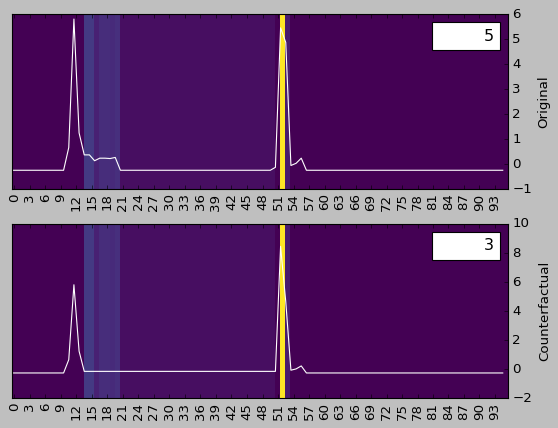

In [16]:
%matplotlib inline
exp_model.plot(item.reshape(-1),np.argmax(y_target,axis=1)[0],exp.reshape(-1),label)

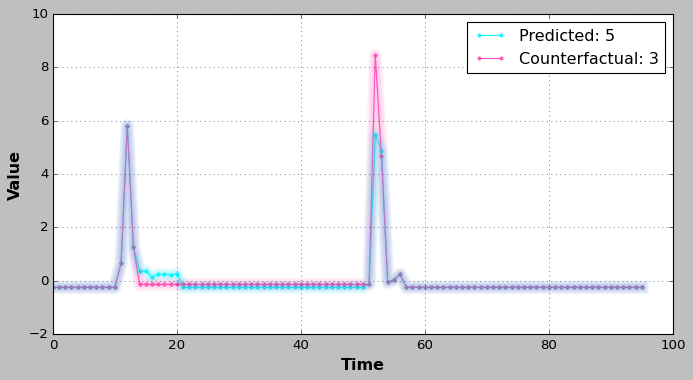

In [17]:
%matplotlib inline
exp_model.plot_in_one(item,np.argmax(y_target,axis=1)[0],exp,label)